# Load/save and structure data

Let's first take a quick survey on the Inaugural assignment process, found [here](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UMEZTODYyVjJWSFBPNTVRMzBMQzFYOE5JQiQlQCN0PWcu).

You will learn to **load and save data** both to and from offline sources (e.g. CSV or Excel). You will learn about **pandas series and dataframes**, and how to clean, rename, structure and index your data.

**Links:**

1. Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
2. DataCamp's [pandas' cheat sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet)

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Pandas dataframes

In Pandas, the fundamental object of interest is a **pandas dataframe**. For example:

In [2]:
X = pd.DataFrame(data = [[1,11.7,'Vitus'],[2,13.9,'Maximilian'],[3,14.6,'Bo-Bob']], 
                 columns=['id','inc','name'])
X

,id,inc,name
0,1,11.7,Vitus
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


**A dataframe is essentially a matrix.**

* rows = observations 
* columns = variables 

**General information:**

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3 non-null      int64  
 1   inc     3 non-null      float64
 2   name    3 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


**What does `object` mean?** In practice it is a `str`.

**Note:** You can also show a dataframe in the  middle of some code.

In [4]:
print('before')
display(X)
print('after')

before


,id,inc,name
0,1,11.7,Vitus
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


after


## Indexing ("subsetting") 

**Choosing a subset of the rows and/or columns of a dataframe is known as "indexing"**. 

Recall the stuff about ***slicing*** and ***logical indices*** from previous lectures. Since Pandas is build in Numpy, we can do the same here.

All pandas dataframes are born with the method `.loc[]` and `.iloc[]`. `.iloc[]` is for numeric indexing and `.loc[]` for logical and name-based indexing. 

* `df.loc[:, ['year']]` selects all rows (indicated by `:`) but only the column (variable) `year`. 
* `df.loc[df['year'] == 2002, :]` selects the rows where the variable `year` is equal to 2002 and all columns (indicated by `:`)
* `df.loc[df['year'] == 2002, ['name']]` selects the variable `name` and shows the rows where `year` is equal to 2002. 

In general, the **syntax** is `df.loc[CONDITION, [VARLIST]]`, where `CONDITION` is a vector of logical statements with the same length as the number of rows in the dataframe, and `VARLIST` is a list over variables. 

In [5]:
X.loc[X['id'] > 1, ['name']]

,name
1,Maximilian
2,Bo-Bob


All variables:

In [6]:
X.loc[X['id'] > 1]

,id,inc,name
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


**Alternatives:**

Use a boolean series

In [7]:
I = X['id'] > 1
print(I)
X.loc[I, ['name']]

0    False
1     True
2     True
Name: id, dtype: bool


,name
1,Maximilian
2,Bo-Bob


Use `.VARIABLE` notation

In [8]:
X.loc[(X.id > 1) & (X.inc > 14), ['id','name']]

,id,name
2,3,Bo-Bob


Why do you think the `.VARIABLE` notation works at all? What does it make you suspect a variable is to the DataFrame?

<span style="color:red"> **WARNING!**</span> you can in fact subset with a numeric index by `.loc`. **But** then we are **not** in half-open intervals. We are in **closed intervals**. So for your own sake, *never* do that. Use `.iloc` for numeric index. 

Subsetting with numerical indexing works the same way as lists and arrays.  
**Syntax:** `df.iloc[ROW INDICES, [COLUMN INDICES]]`

In [9]:
display(X.iloc[0:2,[0,2]])

,id,name
0,1,Vitus
1,2,Maximilian


Remember the **half-open** intervals!

## Adding a variable

Variables are added with `df['newvar'] = SOMETHING`. The length must match.

In [10]:
X['year'] = [2003, 2005, 2010]
X

,id,inc,name,year
0,1,11.7,Vitus,2003
1,2,13.9,Maximilian,2005
2,3,14.6,Bo-Bob,2010


**Note:** You canNOT write `df.newvar = SOMETHING`. Some of you will forget. I promise.  
**Also:** note that you could add the year-variable even though it does not have an explicit row dimension. 

The *something* can be an **expression based on other variables**.

In [11]:
X['inc_adj'] = X.inc / 1.02**(X.year-2005)
X

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


## Assignments to a subset of rows

**LHS:** Selected using logical statement.<br>
**RHS:** Must either be:

1. a **single value** (all rows are set to this) 
2. a **list of values** with same length as the number of selected rows

**Multiple rows, one value:**

In [12]:
# Create copy of X to avoid overwriting it.
Y = X.iloc[:,0:4].copy()
Y.loc[Y.id > 1, ['name']] = 'no name'
print('Y After change in names:')
Y

Y After change in names:


,id,inc,name,year
0,1,11.7,Vitus,2003
1,2,13.9,no name,2005
2,3,14.6,no name,2010


**Multiple rows, multiple values:**

In [13]:
print('Original df:')
Y = X.iloc[:,0:4].copy()
display(Y)

# Subset the rows, where name is Vitus or year is 2005. LHS is incidentally only 2 rows, which match the RHS!
I = (Y.name == 'Vitus') | (Y.year == 2010)

# Print LHS
print('Subset of Y, LHS in assignment:')
display(Y.loc[I,:])

# Assignment
Y.loc[I, ['name']] = ['Bib', 'Peter']

print('Final Y:')
Y

Original df:


,id,inc,name,year
0,1,11.7,Vitus,2003
1,2,13.9,Maximilian,2005
2,3,14.6,Bo-Bob,2010


Subset of Y, LHS in assignment:


,id,inc,name,year
0,1,11.7,Vitus,2003
2,3,14.6,Bo-Bob,2010


Final Y:


,id,inc,name,year
0,1,11.7,Bib,2003
1,2,13.9,Maximilian,2005
2,3,14.6,Peter,2010


## Copies vs. views

Remember the stuff about references to objects from L02 and how making changes in a reference also causes changes in the "original" object? Pandas sort of shields you from that trap.  
Here is how:
When **looking** at the data it is natural to just avoid the `.loc` (as in most other languages):

In [14]:
# Here I'm NOT using the .loc function
Z = Y[['id','name']]
Z

,id,name
0,1,Bib
1,2,Maximilian
2,3,Peter


You can even make subsets without it:

In [15]:
I = Y['id'] > 1
Z[I]

,id,name
1,2,Maximilian
2,3,Peter


Importantly, this **does not work with assignment**.

**Case 1:** Sometimes it does not work outright.

In [16]:
display(X)
Y = X.copy() # Create Y as a new instance by copying
Z1 = Y[['id','name']] # returns a view through chained assignment
Z2 = Y.loc[:, ['id','name']] 
I = Y['id'] > 1

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


In [17]:
# We canNot change Z1 due to the assignment method
Z1.loc[I, ['name']] = 'test'

C:\Users\45238\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
# But it works with Z2 
Z2.loc[I, ['name']] = 'test'
display(Y) # However, we did not change names in Y
display(Z2)

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


,id,name
0,1,Vitus
1,2,test
2,3,test


**Case 2:** Sometimes it works, but it is not intended use.

In [19]:
#display(X)
Y = X.copy()

I = Y['id'] > 1
Z = Y['name'] # returns a view of the column (same with Y.name)
Z[I] = 'test' # Reassigning values to the view of name in Y
Y

C:\Users\45238\AppData\Local\Temp/ipykernel_4492/1727849152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z[I] = 'test' # Reassigning values to the view of name in Y


,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,test,2005,13.90000
2,3,14.6,test,2010,13.22367


**Solution:** Do the assignment in one step.

In [20]:
I = Y['id'] > 1
Y.loc[I, ['name']] = 'test'
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,test,2005,13.90000
2,3,14.6,test,2010,13.22367


Lets have a [**quizz**](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UNDdSQTgzRU1XMlc3MzJEQUo5UjNCRURDSCQlQCN0PWcu) on subsetting.

## The index

The **first column** in the dataset is referred to as the `index` of the dataframe.<br>
**Baseline:** If you haven't done anything, it is just `[0, 1, 2, ....]`.

In [21]:
X.loc[0]
# See the indices of X
print(X.index.values)

[0 1 2]


**Custom:** You can actually use any **unique** identifier. It does not have to be numbers. For example, you can assign the name column to be the index instead.

In [22]:
Y = X.set_index('name') # returns a copy
Y # notice name is now below the other variables

,id,inc,year,inc_adj
name,,,,
Vitus,1,11.7,2003,12.17268
Maximilian,2,13.9,2005,13.90000
Bo-Bob,3,14.6,2010,13.22367


In [23]:
Y.loc['Vitus']

id            1.00000
inc          11.70000
year       2003.00000
inc_adj      12.17268
Name: Vitus, dtype: float64

In [24]:
# See the indices of Y
print(Y.index.values)

['Vitus' 'Maximilian' 'Bo-Bob']


## Series and numpy arrays

When you select an individual variable, it has the data type `Series`. Some functions work on a pandas series (e.g. most numpy functions), but it is sometimes nice to extract the underlying numpy objects: 

* `df`: **pandas dataframe** 
* `df['variable']`: **pandas series**
* `df['variabe'].values` (or `.to_numpy()`): **numpy array**

In [25]:
type(X)

pandas.core.frame.DataFrame

A subset of a DataFrame is a DataFrame

In [26]:
type(X[['year','inc_adj']]) # returns a copy

pandas.core.frame.DataFrame

In [27]:
type(X['year']) # returns a view

pandas.core.series.Series

In [28]:
print([*X['year'].values]) # returns a view

[2003, 2005, 2010]


**Note:** A pd.Series can live outside a DataFrame

In [29]:
d = [0.1,0.2,1.3]
s = pd.Series(d)
print(s, type(s))

0    0.1
1    0.2
2    1.3
dtype: float64 <class 'pandas.core.series.Series'>


## Calling functions

**Row-by-row** Create function that takes row as an argument, and then **apply** the action of the function along the row dimension (axis=1).

In [30]:
Y = X.copy()

# Notice that row is an input argument here
def conc_row_wise(row):
    return str(row['year']) + ' - ' + row['name'] 

# The fact that row is an input argument in the conc_row_wise function is implicitly understood by .apply()
Y['year_name'] = Y.apply(conc_row_wise, axis=1) # Notice that axis = 1 is going down rows. Kind of confusing. 
Y

,id,inc,name,year,inc_adj,year_name
0,1,11.7,Vitus,2003,12.17268,2003 - Vitus
1,2,13.9,Maximilian,2005,13.90000,2005 - Maximilian
2,3,14.6,Bo-Bob,2010,13.22367,2010 - Bo-Bob


**Function for numpy arrays:** use the fact that a Pandas df is based on Numpy arrays to create a function that operate on the rows. This may involve broadcasting (see L03). 

In [31]:
def all_at_once(inc, year):
    return inc*year.max() # Notice that the values of a pd DataFrame column is Numpy, so it has a .max() method. 

Y['inc_adj_year'] = all_at_once(Y.inc.values, Y.year.values)
Y

,id,inc,name,year,inc_adj,year_name,inc_adj_year
0,1,11.7,Vitus,2003,12.17268,2003 - Vitus,23517.0
1,2,13.9,Maximilian,2005,13.90000,2005 - Maximilian,27939.0
2,3,14.6,Bo-Bob,2010,13.22367,2010 - Bo-Bob,29346.0


**Function for numpy arrays with inplace changes** (i.e. a function without any return statement):

In [32]:
# Use referencing of a column to overwrite values in place.
def all_at_once_inplace(inc,year):
    inc[:] = all_at_once(inc,year)

Y['inc_adj_inplace'] = Y.inc
all_at_once_inplace(Y.inc_adj_inplace.values, Y.year.values)
Y

,id,inc,name,year,inc_adj,year_name,inc_adj_year,inc_adj_inplace
0,1,11.7,Vitus,2003,12.17268,2003 - Vitus,23517.0,23517.0
1,2,13.9,Maximilian,2005,13.90000,2005 - Maximilian,27939.0,27939.0
2,3,14.6,Bo-Bob,2010,13.22367,2010 - Bo-Bob,29346.0,29346.0


# Reading and writing data

**Check:** We make sure that we have the **data/** subfolder, and that it has the datasets we need.

In [33]:
import os 

# Using assert to check that paths exist on computer. See L05 for details.
assert os.path.isdir('data/')
assert os.path.isfile('data/RAS200.xlsx')
assert os.path.isfile('data/INDKP107.xlsx')

# Print everything in data
os.listdir('data/')

['area.csv',
 'areal.xlsx',
 'INDKP107.xlsx',
 'INDKP107_long.csv',
 'RAS200.xlsx',
 'RAS200_long.csv']

## Reading in data

Pandas offers a lot of facilities for **reading and writing to different formats**. The functions have logical names: 

* CSV: `pd.read_csv()`
* SAS: `pd.read_sas()`
* Excel: `pd.read_excel()`
* Stata: `pd.read_stata()`
* Parquet: `pd.read_parquet()`

**Inspecting:** 

* `df.head(10)` is ued to inspect the first 10 rows
* `df.sample(10)` is ued to look at 10 random rows

**Example:** Raw download from DST  

Clearly not quite right!

In [34]:
filename = 'data/RAS200.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(5)

,"Activity and employment rates (end November) by frequency, sex, age, ancestry, region and time",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Units: per cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
2,Employment rate,Total,"Age, total",Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
3,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
4,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0


We need to clean this **mess** up.

### Getting the right columns and rows

**Skipping rows:** Clearly, we should **skip** the first three rows and the first four columns

In [35]:
empl = pd.read_excel(filename, skiprows=2)
empl.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Employment rate,Total,"Age, total",Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,NaN,NaN,NaN,NaN,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,NaN,NaN,NaN,NaN,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


**Dropping columns:** The first couple of columns are not needed and contain only missing values (denoted by `NaN` (not-a-number)), so we will drop those. 

**Note:** `df.drop()` is a function that the data frame object applies to itself. Hence, no return value is used.  

In [36]:
# These columns have to go: 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3'
drop_these = ['Unnamed: ' + str(num) for num in range(4)] # use list comprehension to create list of columns
print(drop_these)
empl.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
empl.head(5)

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']


,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


> **Alternative:** Use `del empl['Unnamed: 0'], empl['Unnamed: 1']..`.  

**But!** that borders on code repetition.. Would give you 4 places to make code changes rather than 2 as with the list comprehension above, in case data changed. 

### Renaming variables

We are not happy with the column comprising regions, which is currently called `Unnamed: 4`.   

We rename using `df.rename(columns=dict)`, where dict must be a Python *dictionary*. Why a dictionary? It is simply the most practical solution if you are renaming several columns at once. 

In [37]:
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)
empl.head(5)

,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


**Rename all year columns:** We also see that the employment rate in 2008 has been named `2008`. This is allowed in Python, but having a **variable named as a number** can cause **problems** with some functions (and many other programming languages do not even allow it), so let us change their names.   
To change all columns, we need to create a dictionary that maps each of the years {2008, ..., 2016} to {e2008, ..., e2016}. 

In [38]:
col_dict = {}
for i in range(2008, 2017+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'e{i}' 
col_dict

{'2008': 'e2008',
 '2009': 'e2009',
 '2010': 'e2010',
 '2011': 'e2011',
 '2012': 'e2012',
 '2013': 'e2013',
 '2014': 'e2014',
 '2015': 'e2015',
 '2016': 'e2016',
 '2017': 'e2017'}

In [39]:
empl.rename(columns = col_dict, inplace=True)
empl.head(10)

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5


**A big NO-NO!!** is to put *white spaces* in column names. You can theoretically have a column such as empl['e 2017'] in a pandas df, but this is *very likely* to get messy. And you can no longer use `.`notation. 

**Extract:** Now we can find the employment rate in the municipality where Christian grew up: 

In [40]:
empl.loc[empl.municipality == 'Hillerød']

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
30,Hillerød,81.4,78.6,77.7,77.5,77.6,77.3,77.2,77.7,78.2,78.2


### Dropping observations that are not actually municipalities 

The dataset contains observations like "Region Hovedstaden", which is not a municipality, so we want to drop such rows. To do this, we can use the `df['var'].str` functionalities. These are all sorts of functions that work with strings, in particular searching for instances of specific content by `df['var'].str.contains('PATTERN')`. 

In [41]:
# Build up a logical index I
I = empl.municipality.str.contains('Region')
I |= empl.municipality.str.contains('Province')
I |= empl.municipality.str.contains('All Denmark')
empl.loc[I, :]

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4
21,Province Nordsjælland,79.4,76.9,76.3,76.1,75.8,75.8,76.1,76.5,77.1,77.6
33,Province Bornholm,68.0,66.4,65.9,67.1,66.0,66.1,67.0,67.3,69.3,70.2
36,Region Sjælland,75.7,72.7,71.9,71.6,70.9,71.0,71.3,71.9,72.6,73.3
37,Province Østsjælland,79.5,76.7,75.8,75.7,75.0,75.0,75.3,76.0,76.7,77.7
43,Province Vest- og Sydsjælland,74.2,71.1,70.3,69.9,69.2,69.3,69.7,70.1,70.8,71.5
56,Region Syddanmark,75.7,72.0,71.2,70.7,70.0,70.1,70.5,70.8,71.6,72.5


**Delete these rows:**

In [42]:
empl = empl.loc[I == False] # keep everything else
empl.head(10)

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5
10,Brøndby,72.3,69.6,68.3,68.2,67.4,67.5,67.3,68.0,69.1,69.4
11,Gentofte,79.2,76.6,76.4,76.1,75.5,75.2,74.7,75.1,75.2,76.1
12,Gladsaxe,77.9,75.0,74.1,73.6,73.2,73.1,73.4,74.1,74.3,75.3
13,Glostrup,79.2,76.1,74.5,75.0,74.7,74.8,74.4,75.0,75.5,76.0


In [43]:
empl.reset_index(inplace = True)
empl.loc[0:1,:]

,index,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
0,3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
1,4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


### Summary statistics 

To get an overview of employments across municipalities we can use the function `df.describe()`.

In [44]:
empl.describe()

,index,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,59.040404,76.629293,73.419192,72.794949,72.591919,72.020202,72.091919,72.431313,72.876768,73.669697,74.463636
std,33.173299,3.727538,3.626537,3.617062,3.691211,3.804240,3.704484,3.660062,3.647275,3.549690,3.554114
min,3.000000,62.900000,63.400000,62.400000,61.500000,60.700000,61.200000,61.600000,62.200000,62.600000,63.100000
25%,29.500000,74.650000,71.350000,70.550000,70.000000,69.450000,69.700000,70.200000,70.750000,71.500000,72.500000
50%,60.000000,76.800000,73.300000,72.900000,72.600000,72.100000,72.200000,72.600000,73.100000,74.000000,74.600000
75%,87.500000,79.150000,75.900000,75.200000,75.050000,74.500000,74.500000,74.700000,75.200000,75.700000,76.700000
max,115.000000,84.000000,81.500000,81.400000,80.500000,80.700000,80.500000,80.900000,81.200000,81.800000,82.200000


**Single descriptive statistic:** We can also just get the mean for each year:

In [45]:
empl.mean()

C:\Users\45238\AppData\Local\Temp/ipykernel_4492/378030340.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  empl.mean()


index    59.040404
e2008    76.629293
e2009    73.419192
e2010    72.794949
e2011    72.591919
e2012    72.020202
e2013    72.091919
e2014    72.431313
e2015    72.876768
e2016    73.669697
e2017    74.463636
dtype: float64

## Long vs. wide datasets: `pd.wide_to_long()`

Often in economic applications, it can be useful to switch between *wide* vs. *long* formats (long is sometimes referred to as *tall*, e.g. in Stata). This is done by the commands `pd.wide_to_long()` (and `pd.long_to_wide()`).  Many types of analysis are easier to do in one format than in another so it is extremely useful to be able to switch comfortably between formats. 

**Common:** Think of a dataset as having an `ID` and a `PERIOD` variable. In our dataset `empl`, the `ID` variable is `municipality`, and the `PERIOD` variable is `year`. 

**Wide dataset:** The default from Statistics Denmark: 1 row in data per `ID` and a variable for each `PERIOD`. If there are more than one variable per observation that varies by period, then a new block of period-wise cases must be created along columns.  

**Long dataset:** There is one row for each combination of (`ID`, `PERIOD`). Vertical blocks of periods. 

A **long dataset** is often easier to work with if you have more than one time-varying variable in the data set. 

In general, Pandas will assume that the variables in the *wide* format have a particular structure: namely they are of the form `XPERIOD`, where `X` is called the "stub". In our case, the variable names are e.g. `e2011`, so the stub is `e` and the period (for that variable) is `2011`. You'll want to clean out the variable names if there is anything after the `period` part.

In [46]:
empl_long = pd.wide_to_long(empl, stubnames='e', i='municipality', j='year')
empl_long.head(10)

,,index,e
municipality,year,,
Copenhagen,2008,3,72.5
Frederiksberg,2008,4,75.6
Dragør,2008,5,80.5
Tårnby,2008,6,79.0
Albertslund,2008,8,73.1
Ballerup,2008,9,75.9
Brøndby,2008,10,72.3
Gentofte,2008,11,79.2
Gladsaxe,2008,12,77.9


**Note:** The variables `municipality` and `year`  are now in the index!! We see that because they are "below" `e` in the `head` overview. 

In [47]:
# The index variable now consists of tuples. 
print(empl_long.index.values[0:8])

[('Copenhagen', 2008) ('Frederiksberg', 2008) ('Dragør', 2008)
 ('Tårnby', 2008) ('Albertslund', 2008) ('Ballerup', 2008)
 ('Brøndby', 2008) ('Gentofte', 2008)]


We can **select a specific municipality** using ``.xs``:

In [48]:
empl_long.xs('Roskilde',level='municipality')

,index,e
year,,
2008,41,79.1
2009,41,76.3
2010,41,75.2
2011,41,74.9
2012,41,74.1
2013,41,74.0
2014,41,74.0
2015,41,74.5
2016,41,75.6


Or ``.loc[]`` in a special way:

In [49]:
empl_long.loc[empl_long.index.get_level_values('municipality') == 'Roskilde', :]

index     e
municipality year             
Roskilde     2008     41  79.1
             2009     41  76.3
             2010     41  75.2
             2011     41  74.9
             2012     41  74.1
             2013     41  74.0
             2014     41  74.0
             2015     41  74.5
             2016     41  75.6
             2017     41  76.8

**Alternative:** Reset the index, and use `.loc` as normal.

In [50]:
empl_long = empl_long.reset_index()
empl_long.loc[empl_long.municipality == 'Roskilde', :]

,municipality,year,index,e
33,Roskilde,2008,41,79.1
132,Roskilde,2009,41,76.3
231,Roskilde,2010,41,75.2
330,Roskilde,2011,41,74.9
429,Roskilde,2012,41,74.1
528,Roskilde,2013,41,74.0
627,Roskilde,2014,41,74.0
726,Roskilde,2015,41,74.5
825,Roskilde,2016,41,75.6
924,Roskilde,2017,41,76.8


### Plotting interactively  
Here's a cute little plot using the builtin pandas plot function. 

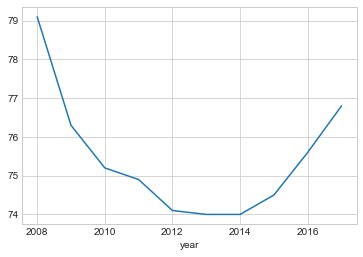

In [51]:
empl_long.loc[empl_long['municipality'] == 'Roskilde', :].plot(x='year',y='e',legend=False);

We can even do it **interactively**:

In [52]:
import ipywidgets as widgets
def plot_e(df, municipality): 
    I = df['municipality'] == municipality
    ax=df.loc[I,:].plot(x='year', y='e', style='-o', legend=False)

In [53]:
widgets.interact(plot_e, 
    df = widgets.fixed(empl_long),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique(), 
                                    value='Roskilde')
); 

interactive(children=(Dropdown(description='Municipality', index=33, options=('Copenhagen', 'Frederiksberg', '…

## Income

Next, we will read in the avg. disposable income for highly educated in each municipality. Here we do the cleaning, renaming and structuring in a few condensed lines.

In [54]:
# a. load
inc = pd.read_excel('data/INDKP107.xlsx', skiprows=2)

# b. clean and rename
inc.drop([f'Unnamed: {i}' for i in range(4)], axis=1, inplace=True) # using list comprehension
inc.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True) 
inc.rename(columns = {str(i): f'inc{i}' for i in range(2004,2018)}, inplace=True) # using dictionary comprehension

# c. drop rows with missing values. Denoted na
inc.dropna(inplace=True)

# d. remove non-municipalities. Notice how to avoid code repetition!
for val in ['Region','Province', 'All Denmark']: 
    I = inc.municipality.str.contains(val)
    inc.drop(inc[I].index, inplace=True) # .index -> get the indexes of the series
    
inc.head(5)

,municipality,inc2004,inc2005,inc2006,inc2007,inc2008,inc2009,inc2010,inc2011,inc2012,inc2013,inc2014,inc2015,inc2016,inc2017
3,Copenhagen,233204.0,244462.0,255315.0,254533.0,259216.0,266636.0,297422.0,303717.0,308601.0,316362.0,325070.0,334083.0,327179.0,333579.0
4,Frederiksberg,276111.0,291299.0,305539.0,301547.0,296988.0,304406.0,349249.0,356537.0,363466.0,376072.0,379308.0,397210.0,389151.0,409097.0
5,Dragør,326324.0,330289.0,339630.0,367640.0,371290.0,375508.0,425605.0,471854.0,457410.0,469260.0,482857.0,494313.0,475567.0,490152.0
6,Tårnby,264299.0,273414.0,291735.0,279844.0,288973.0,296610.0,336077.0,368789.0,347705.0,357150.0,359455.0,372565.0,360230.0,373304.0
8,Albertslund,253319.0,260060.0,270290.0,267863.0,269855.0,283067.0,313767.0,308977.0,320298.0,328004.0,334630.0,344447.0,334094.0,332943.0


**Convert** wide -> long:

In [55]:
inc_long = pd.wide_to_long(df=inc, stubnames='inc', i='municipality', j='year')
inc_long.reset_index(inplace=True)
inc_long.head(5)

,municipality,year,inc
0,Copenhagen,2004,233204.0
1,Frederiksberg,2004,276111.0
2,Dragør,2004,326324.0
3,Tårnby,2004,264299.0
4,Albertslund,2004,253319.0


## Municipal area

Finally, let's read in a dataset on municipality areas in km$^2$. 

In [56]:
# a. load
area = pd.read_excel('data/areal.xlsx', skiprows=2)

# b. clean and rename
area.rename(columns = {'Unnamed: 0':'municipality','2019':'km2'}, inplace=True)

# c. drop rows with missing
area.dropna(inplace=True)

# d. remove non-municipalities
for val in ['Region','Province', 'All Denmark']: 
    I = area.municipality.str.contains(val)
    area.drop(area[I].index, inplace=True)
    
area.head(5)

,municipality,km2
2,Copenhagen,86.7
3,Frederiksberg,8.7
4,Dragør,18.3
5,Tårnby,66.1
6,Albertslund,23.4


## Writing data

As with reading in data, we have the corresponding functions for **writing data**:

* CSV: `pd.to_csv()`
* SAS: `pd.to_sas()`
* Excel: `pd.to_excel()`
* Stata: `pd.to_stata()`
* Parquet: `pd.to_parquet()`

Let's **save our dataset to CSV form**. We will set `index=False` to avoid saving the index (which does not mean anything here but can in other contexts be an annoying thing). 

In [57]:
empl_long.to_csv('data/RAS200_long.csv', index=False)
inc_long.to_csv('data/INDKP107_long.csv', index=False)
area.to_csv('data/area.csv', index=False)

## Be cautious

Code for cleaning data tend to get long and repetetive. But remember **DRY**! Errors crop up in data cleaning when you just copy blocks of code around. Avoid repetitions at all costs.

# Summary

**This lecture**: We have discussed

1. The generel pandas framework (indexing, assigment, copies vs. views, functions)
2. Loading and saving data
3. Basic data cleaning (renaming, droping etc.)
4. Wide $\leftrightarrow$ long transformations

**Your work:** Before solving Problem Set 3 read through this notebook and play around with the code.

**Next lecture:** Basic data analysis.

**Data exploration?:** Try out [dtale](https://github.com/man-group/dtale).